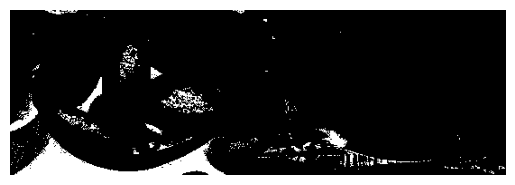

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio

# Đọc ảnh đu đủ và dưa hấu
papaya = iio.imread("du du.jpg", mode="F").astype(np.uint8)
watermelon = iio.imread("dua hau.jpg")

# Tạo gradient màu cho đu đủ: đỏ -> xanh lá
rows, cols = papaya.shape[:2]
gradient_papaya = np.zeros((rows, cols, 3), dtype=np.uint8)
for i in range(rows):
    t = i / (rows - 1)
    r = int(255 * (1 - t))
    g = int(255 * t)
    b = 0
    gradient_papaya[i, :, :] = [r, g, b]
mask_papaya = papaya > 10  # Ngưỡng để lấy vùng quả đu đủ
colored_papaya = np.zeros_like(gradient_papaya)
for c in range(3):
    colored_papaya[..., c] = papaya * gradient_papaya[..., c] // 255
colored_papaya[~mask_papaya] = 0

# Tạo gradient màu cho dưa hấu: vàng -> tím
rows2, cols2 = watermelon.shape[:2]
gradient_watermelon = np.zeros((rows2, cols2, 3), dtype=np.uint8)
for i in range(rows2):
    t = i / (rows2 - 1)
    r = int(255 * (1 - t) + 128 * t)
    g = int(255 * (1 - t))
    b = int(255 * t)
    gradient_watermelon[i, :, :] = [r, g, b]
mask_watermelon = watermelon[..., 0] > 10  # Ngưỡng để lấy vùng quả dưa hấu
colored_watermelon = np.zeros_like(gradient_watermelon)
for c in range(3):
    colored_watermelon[..., c] = watermelon[..., c] * gradient_watermelon[..., c] // 255
colored_watermelon[~mask_watermelon] = 0

# Tạo nền trong suốt đủ lớn để ghép hai quả
h = max(rows, rows2)
w = cols + cols2
result = np.zeros((h, w, 4), dtype=np.uint8)

# Ghép đu đủ bên trái, dưa hấu bên phải
result[:rows, :cols, :3] = colored_papaya
result[:rows, :cols, 3] = mask_papaya.astype(np.uint8) * 255
result[:rows2, cols:cols+cols2, :3] = colored_watermelon
result[:rows2, cols:cols+cols2, 3] = mask_watermelon.astype(np.uint8) * 255

# Lưu ảnh PNG nền trong suốt
iio.imwrite("fruit_combo.png", result)

# Hiển thị kết quả
plt.imshow(result)

plt.show()
plt.imshow(colored_papaya)
plt.show()